In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os

from astropy.cosmology import FlatLambdaCDM
import GCR
import GCRCatalogs as GCRCat
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import itertools
from itertools import permutations 
from itertools import product 
import bilby as bb


cosmo = FlatLambdaCDM(H0=70, Om0=0.283, Tcmb0=2.725)

plt.rcParams.update({

    # --- Figure Layout ---
    "figure.figsize": (6, 4),           # Default figure size in inches
    "figure.dpi": 150,                  # DPI for crisp rendering
    "savefig.dpi": 300,                 # Higher DPI for saved figures
    "figure.autolayout": True,          # Avoids label overlap

    # --- Font & Text ---
    "font.family": "monospace",             # Or "sans-serif" for modern look
    "font.serif": ["Terminal"],  # Matches many journals
    "font.size": 12,                    # Base font size
    "axes.titlesize": 14,               # Title font size
    "axes.labelsize": 13,               # Axis label size
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "mathtext.fontset": "dejavuserif",  # Matches the serif font

    # --- Line & Marker Styles ---
    "lines.linewidth": 1.8,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.7,

    # --- Axes ---
    "axes.linewidth": 1.0,              # Frame thickness
    "axes.labelpad": 6,                 # Padding between label and axis
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
    "axes.spines.top": False,           # Removes top spine
    "axes.spines.right": False,         # Removes right spine

    # --- Ticks ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.top": False,
    "ytick.right": False,

    # --- Legend ---
    "legend.frameon": False,
    "legend.handlelength": 2,
    "legend.handletextpad": 0.4,
    "legend.loc": "best",

    # --- Colors and Colormaps ---
    "image.cmap": "viridis",            # Good perceptually uniform default
    "axes.prop_cycle": plt.cycler("color", [
        "#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b",
        "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
    ]),
})

In [3]:
def LSST_mag_lim(C_m,m_sky,theta_eff,t_vis,k_m,X):
    '''
    C_m is the band dependent parameter
    m_sky is the sky brightness (AB mag arcsec−2)
    theta_eff is the seeing (in arcseconds)
    t_vis is the exposure time (seconds)
    k_m is the atmospheric extinction coefficient
    X is air mass
    '''
    return C_m + 0.5 * (m_sky-21) + 2.5*np.log10(0.7/theta_eff)+1.25*np.log10(t_vis/30)-k_m*(X-1)

def getLSSTBandParameters(band):
    # Band dict in the form of band: [C_m,m_sky,theta_eff,k_m]
    # From eq. 6 of Ivecic 2019
    bandDict = {"u":[23.09,22.99,0.92,0.491],
                "g":[24.42,22.26,0.87,0.213],
                "r":[24.44,21.20,0.83,0.126],
                "i":[24.32,20.48,0.80,0.096],
                "z":[24.16,19.60,0.78,0.069],
                "y":[23.73,18.61,0.76,0.170],
               }
    return bandDict[band.lower()]

In [4]:
visits_per_yr = np.array([56, 74, 184, 187, 166, 171])/10 # visits per year in u-g-r-i-z-y
expTimes = [38,30,30,30,30,30]
X = 1.3 # SDSS average, for reference
allBands = ["u","g","r","i","z","y"]

In [5]:
maglist = []
for y in np.arange(1,11):
    print(f"For year {y}")
    for b,v,expTime in zip(allBands,visits_per_yr,expTimes):
        C_m,m_sky,theta_eff,k_m = getLSSTBandParameters(b)
        mag = LSST_mag_lim(C_m,m_sky,theta_eff,y*expTime*v,k_m,X)
        print(f"{b}: {mag:.2f}")
        maglist.append(mag)
    print()
maglist = np.reshape(maglist,(10,6))

For year 1
u: 24.70
g: 25.84
r: 25.90
i: 25.48
z: 24.85
y: 23.94

For year 2
u: 25.08
g: 26.21
r: 26.27
i: 25.85
z: 25.22
y: 24.31

For year 3
u: 25.30
g: 26.43
r: 26.49
i: 26.07
z: 25.44
y: 24.53

For year 4
u: 25.46
g: 26.59
r: 26.65
i: 26.23
z: 25.60
y: 24.69

For year 5
u: 25.58
g: 26.71
r: 26.77
i: 26.35
z: 25.72
y: 24.81

For year 6
u: 25.68
g: 26.81
r: 26.87
i: 26.45
z: 25.82
y: 24.91

For year 7
u: 25.76
g: 26.89
r: 26.95
i: 26.53
z: 25.90
y: 24.99

For year 8
u: 25.83
g: 26.97
r: 27.03
i: 26.60
z: 25.98
y: 25.06

For year 9
u: 25.90
g: 27.03
r: 27.09
i: 26.67
z: 26.04
y: 25.13

For year 10
u: 25.95
g: 27.09
r: 27.15
i: 26.73
z: 26.10
y: 25.19



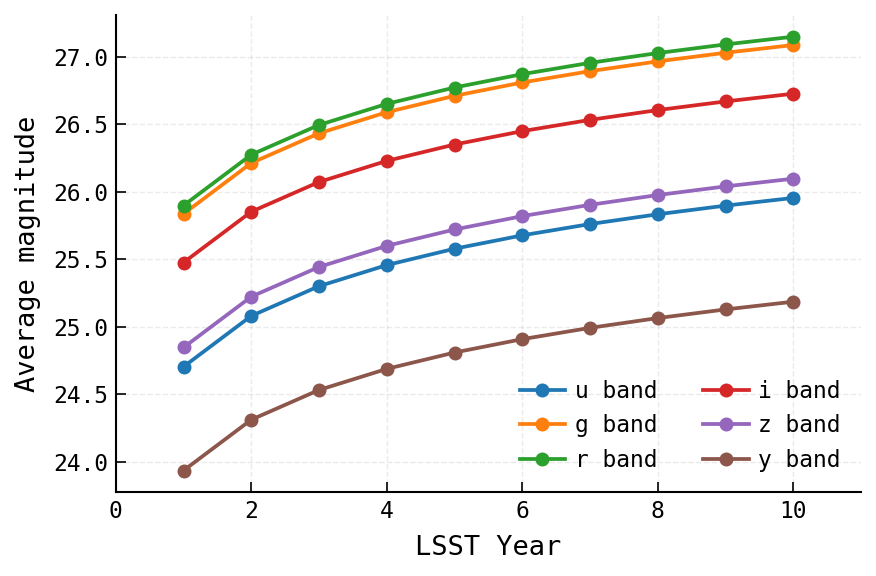

In [6]:
for b,mags in zip(allBands,maglist.T):
    plt.plot(np.arange(1,11),mags,"-o",label=f"{b} band")
plt.xlabel("LSST Year")
plt.ylabel("Average magnitude")
plt.xlim(0,11)
plt.legend(ncols=2)
plt.tight_layout()
plt.show()

## Host Probability

Here, we want to take a redshift limit, in the z-L plane, and draw randomly from all galaxies that are brighter AND within the aforementioned redshift range

# SkySim5000

In [7]:
for ent in GCRCat.get_available_catalog_names():
    if ent.startswith("skysim"):
        print(ent)

skysim5000_v1.1.1
skysim5000_v1.1.1_redmagic_v0.8.5_highdens
skysim5000_v1.1.1_redmagic_v0.8.5_highlum
skysim5000_v1.1.1_redmapper_v0.8.5
skysim5000_v1.1.2
skysim5000_v1.2


In [8]:
import pandas as pd

cat_name2 = "skysim5000_v1.2_small"
skysimCat = GCRCat.load_catalog(cat_name2)
# catz.shape

In [9]:
cosmo = skysimCat.cosmology

In [10]:
cosmo

FlatLambdaCDM(name=None, H0=<Quantity 71. km / (Mpc s)>, Om0=0.2648, Tcmb0=<Quantity 0. K>, Neff=3.04, m_nu=None, Ob0=0.0448)

In [11]:
from astropy import units as u

Unit("km / (Mpc s)")

In [18]:
cosmo.Tcmb0.unit == u.K

True

## Validate a schecter function across wide z for different LSST filters
- u-g-r-i-z-Y
- from z=0 to z=3, in bins of z=0.5 width
- semilogy plot, x axis showing absolute mag in a certain band, y axis showing log luminosity function (i.e., number of galaxies in that luminosity bin, renormalized to 1/Mpc^3)
- abs mag range - -22.5 to -15.5. step in steps of 0.2

In [9]:
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest"])

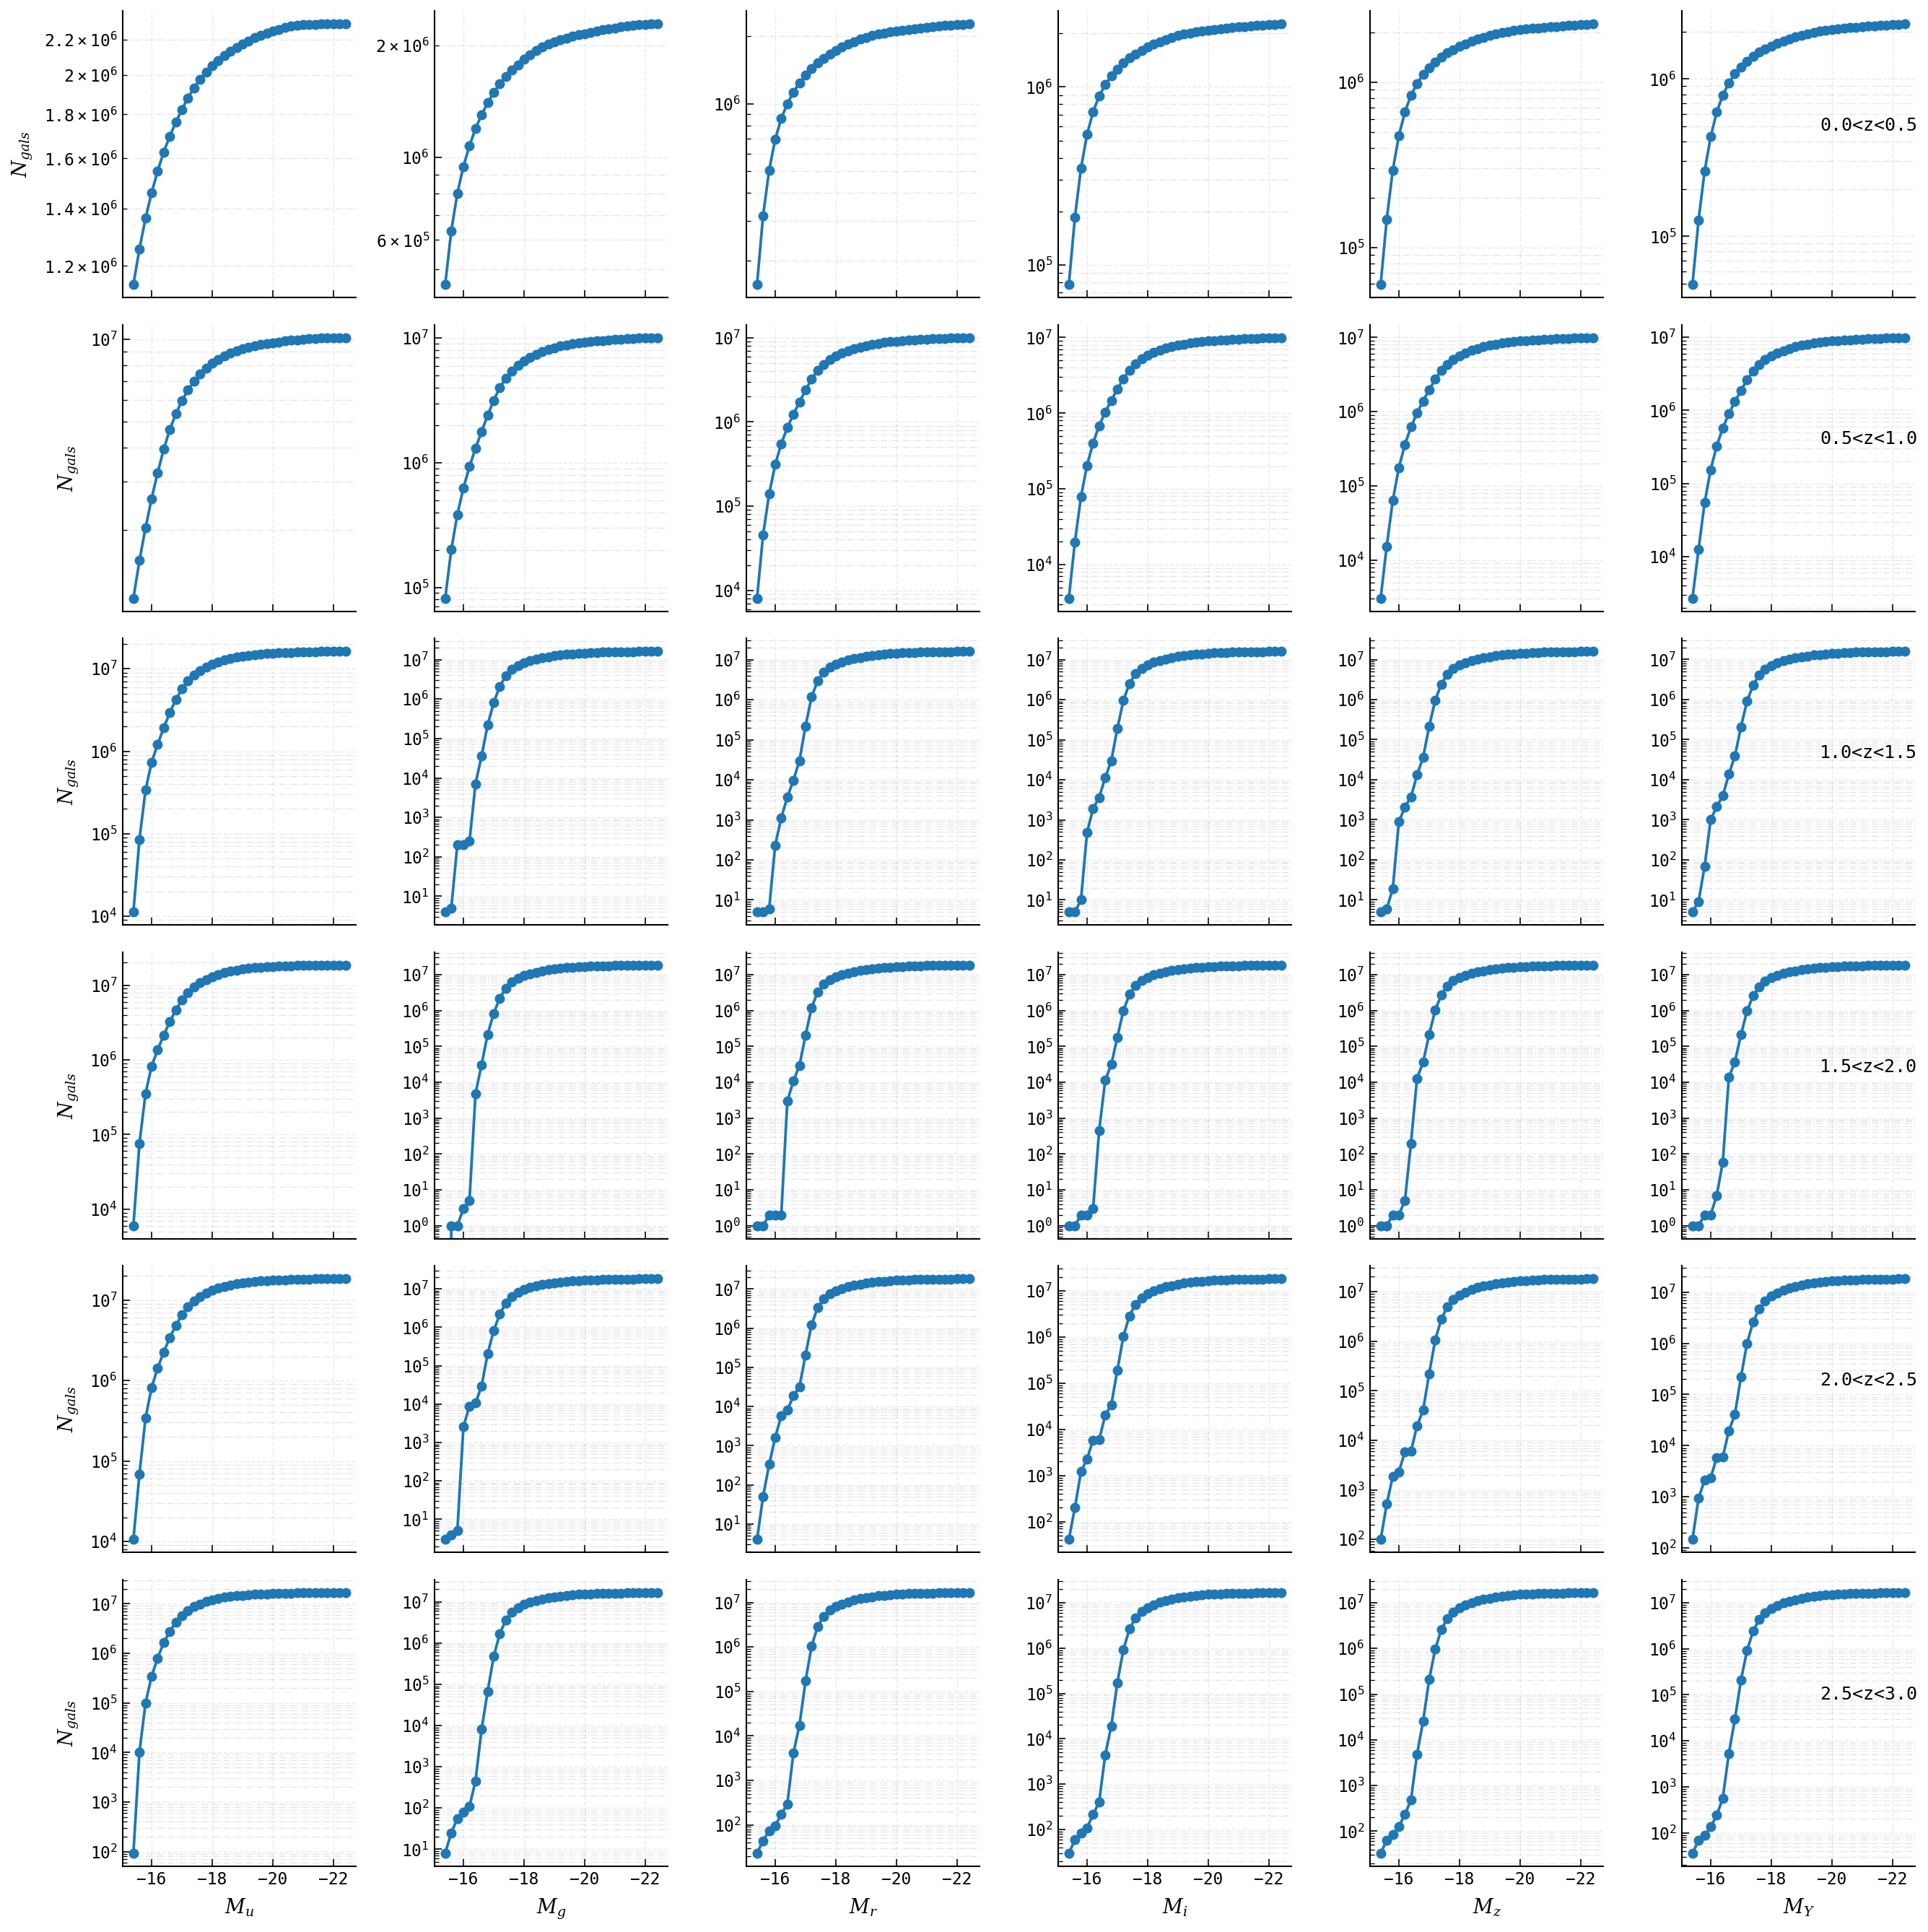

In [10]:
z_step = 0.5
delta_mag = 0.2
fig,axs = plt.subplots(6,6,figsize=(18,18),sharex=True)

rowIter=0

# allDataDict= {}

for z_lower in np.arange(0,3,step=z_step):
    # %%time
    data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest),filters=(f"redshift>{z_lower}",f"redshift<{z_lower+z_step}","is_central==True")))
    colIter=0
    for columnName in ["LSST_filters/magnitude:LSST_u:rest",
                           "LSST_filters/magnitude:LSST_g:rest",
                           "LSST_filters/magnitude:LSST_r:rest",
                           "LSST_filters/magnitude:LSST_i:rest",
                           "LSST_filters/magnitude:LSST_z:rest",
                           "LSST_filters/magnitude:LSST_y:rest"]:

        band = columnName.split(":")[-2][-1]
        
        ax = axs[rowIter,colIter]
        
        bin_num = {}
        for mag_low in np.arange(-22.5,-15.4,step=delta_mag):
            bin_num[mag_low+delta_mag/2] = len(data[np.logical_and(data[columnName]>mag_low, data[columnName]>mag_low+delta_mag)])

        # allDataDict[z_lower] = dict(band,bin_num)
        
        k,v = bin_num.keys(),bin_num.values()
        
        ax.plot(k,v,"-o")
        ax.semilogy()
        ax.xaxis.set_inverted(True)

        colIter+=1
    rowIter+=1

    ax.text(0.8, 0.6, f'{z_lower}<z<{z_lower+z_step}',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

for a,band in zip(axs[-1,:],["u","g","r","i","z","Y"]):
    a.set_xlabel("$M_{}$".format(band))

for a in axs[:,0]:
    a.set_ylabel("$N_{gals}$")

for a in axs.flatten():
    a.grid(ls='--',which='major')
    a.grid(ls='-.',which='minor',alpha=0.3)

fig.tight_layout()
fig.savefig(os.path.join(os.getcwd(),"SkySimSchecter.jpg"),dpi=200)
plt.show()

In [11]:
%%time
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))

CPU times: user 3.41 s, sys: 16.8 s, total: 20.3 s
Wall time: 29.8 s


In [12]:
data

,LSST_filters/magnitude:LSST_y:rest,halo_mass,is_central,stellar_mass,LSST_filters/magnitude:LSST_g:rest,redshiftHubble,galaxyID,LSST_filters/magnitude:LSST_r:rest,redshift,LSST_filters/magnitude:LSST_i:rest,LSST_filters/magnitude:LSST_z:rest,LSST_filters/magnitude:LSST_u:rest
0,-19.774324,2.472611e+11,True,3.843968e+09,-19.170687,0.021528,10070000000000,-19.490667,0.022012,-19.641598,-19.720839,-18.130419
1,-16.442663,5.465768e+10,True,4.857164e+07,-15.799252,0.020944,10070000000001,-16.130363,0.020724,-16.299818,-16.384882,-14.983802
2,-20.023260,3.487682e+11,True,4.128166e+09,-19.306858,0.020528,10070000000002,-19.664007,0.020922,-19.851128,-19.957903,-18.356327
3,-16.926462,7.027417e+10,True,5.973682e+07,-16.075336,0.017873,10070000000003,-16.518398,0.018407,-16.736721,-16.854864,-15.005349
4,-17.655111,8.068516e+10,True,1.942851e+08,-17.022739,0.001106,10070000000004,-17.320200,0.000889,-17.488804,-17.590200,-16.253250
...,...,...,...,...,...,...,...,...,...,...,...,...
93947746,-18.748577,4.476727e+10,True,9.498182e+07,-18.458942,3.026532,9943200191150,-18.602928,3.028287,-18.674686,-18.710220,-17.562988
93947747,-19.249542,5.842828e+10,True,1.423304e+08,-19.071177,3.012949,9943200191151,-19.150379,3.012375,-19.191593,-19.215153,-18.306728
93947748,-18.812241,1.106196e+10,True,7.870476e+06,-18.618912,3.013216,9943200191152,-18.704712,3.012953,-18.753759,-18.781633,-17.951912
93947749,-17.154819,1.303879e+10,True,7.911783e+06,-17.100580,2.967263,9943200191153,-17.130688,2.965215,-17.144182,-17.140089,-16.476864


<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1186797/107138587.py:8: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel("$log(M_{\odot})$")


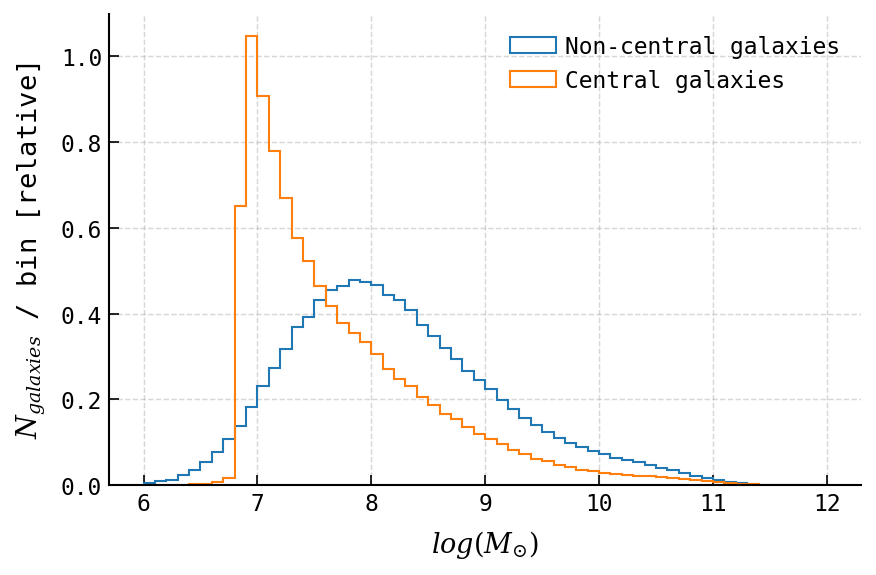

In [13]:
msk = data["is_central"]==False

fig,ax = plt.subplots()

ax.hist(np.log10(data["stellar_mass"][msk]),bins=np.arange(6,12.1,step=0.1),histtype='step',label="Non-central galaxies",density=True)
ax.hist(np.log10(data["stellar_mass"][~msk]),bins=np.arange(6,12.1,step=0.1),histtype='step',label="Central galaxies",density=True)

ax.set_xlabel("$log(M_{\odot})$")
ax.set_ylabel("$N_{galaxies}$ / bin [relative]")
ax.grid(alpha=0.5)
ax.legend()

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1186797/1072552874.py:14: SyntaxWarning: invalid escape sequence '\o'
  axs[0].set_ylabel("$log(M_\odot)$")


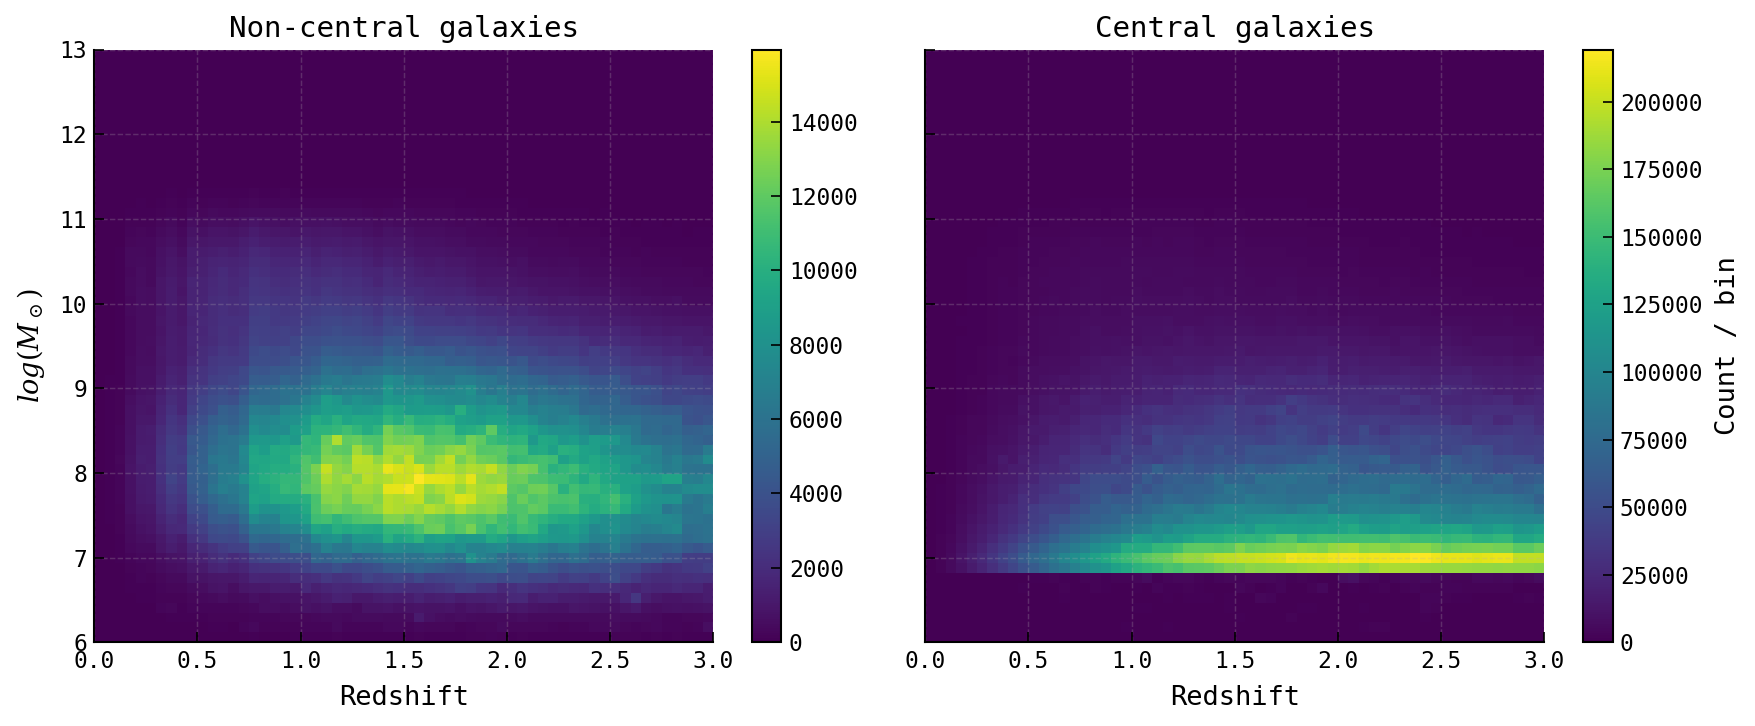

In [14]:
fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    cc = ax.hist2d(data["redshift"][mask],np.log10(data["stellar_mass"][mask]),bins=[60,60],range=[[0,3],[6,13]])

    if ax==axs.flatten()[0]:
        fig.colorbar(cc[3], ax=ax)
    else:
        fig.colorbar(cc[3], ax=ax,label="Count / bin")
        
    ax.set_title(f"{lbl} galaxies")
    ax.set_xlabel("Redshift")
    
axs[0].set_ylabel("$log(M_\odot)$")
fig.tight_layout()

## Parent catalogs to generate
- Unaltered

In [15]:
myQuantitiesOfInterest = np.array(["ra","dec","redshift","redshiftHubble","galaxyID",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "totalMassStellar","stellar_mass","is_central"])

In [16]:
%%time
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest),))

CPU times: user 2.88 s, sys: 13.2 s, total: 16.1 s
Wall time: 27.1 s


## Weights to assign
- $L$
- $M_{star}$
- Uniform

In [17]:
del data

In [18]:
%%time 
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))
msk = data["is_central"]==False

CPU times: user 3.66 s, sys: 14.4 s, total: 18 s
Wall time: 22.1 s


In [19]:
for band in ["u","g","r","i","z","y"]:
    data["weight_L_{}".format(band)] = data["LSST_filters/magnitude:LSST_{}:rest".format(band)]/np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)])
    data["weight_logL_{}".format(band)] = np.log10(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30)/np.log10(np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30))
data["weight_M"] = data["stellar_mass"]/np.median(data["stellar_mass"])
data["weight_logM"] = np.log10(data["stellar_mass"])/np.log10(np.median(data["stellar_mass"]))

In [ ]:
data

In [ ]:
fig,axs = plt.subplots(2,1,figsize = (6,5),sharex=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    for band in ["u","g","r","i","z","y"]:
        ax.hist(data["weight_L_{}".format(band)][mask],label="{} band".format(band),histtype="step",bins=np.arange(0.6,1.41,step=0.01),density=True)
    ax.legend()
    ax.text(0.65,1.5,f"{lbl}\ngalaxies")
ax.set_xlabel("Luminosity weight in band")

In [ ]:
fig,axs = plt.subplots(2,1,figsize = (6,5),sharex=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    for band in ["u","g","r","i","z","y"]:
        ax.hist(data["weight_logL_{}".format(band)][mask],label="{} band".format(band),histtype="step",bins=np.arange(0.6,1.41,step=0.01),density=True)
    ax.legend()
    ax.text(0.65,1.5,f"{lbl}\ngalaxies")
ax.set_xlabel("Log-Luminosity weight in band")

In [ ]:
fig,ax = plt.subplots(figsize = (5,3))

for mask,lbl in zip([msk,~msk],["Non-central","Central"]):
    ax.hist(data["weight_M"][mask],label=f"{lbl} galaxies",histtype="step",bins=np.arange(0.2,350,step=0.5),density=True,log=True)
ax.legend()
ax.set_xlabel("Stellar mass weight in band")

In [ ]:
del fig

# Recreate P(z) plots, this time separated by central/non-central

## draw 1M samples for each catalog

In [ ]:
data.columns.values

#### The above histograms show that the only band that might have a different weight distribution. Therefore, I will drop all bands except u band, and one of g-r-i-z-y. I have chosen to keep r band here

In [ ]:
for band in ["r","i","z","y"]:
    try:
        data.drop("LSST_filters/magnitude:LSST_{}:rest".format(band),inplace=True,axis=1)
        data.drop("weight_L_{}".format(band),inplace=True,axis=1)
        data.drop("weight_logL_{}".format(band),inplace=True,axis=1)
    except:
        continue

In [ ]:
data.columns.values

In [ ]:
weights = ["weight_L","weight_logL","weight_M","weight_logM"]
# weights = ["weight_L","weight_M","weight_logM"]
remaining_bands = ["u","g"]
df_dict = {}

In [ ]:
%%time 
# np.random.seed(1503170817)
n_merges = int(1E6) # Updated now to 1E7
# Getting indexes based on p_host
events_index_uniform = np.random.choice(data.index, 
                                size=n_merges, 
                                # p=phost.values
                                       )

df_dict["Uniform"]=data.iloc[events_index_uniform]

# Now we do the different weights

# Getting indexes based on p_host
for weight in weights:
    if (weight!="weight_L" and weight!="weight_logL"):
        events_index = np.random.choice(data.index, 
                                        size=n_merges, 
                                        p=data[weight]/np.sum(data[weight])
                                               )
        df_dict[weight] = data.iloc[events_index]
    else:
        for band in remaining_bands:
            newWeight=weight+"_"+band
            events_index = np.random.choice(data.index, 
                                            size=n_merges, 
                                            p=data[newWeight]/np.sum(data[newWeight])
                                                   )
            df_dict[newWeight] = data.iloc[events_index]

In [ ]:
df_dict.keys()

In [ ]:
del data

In [ ]:
colors=[
    "#0085ad",
"#af272f",
"#4c8c2b",
"#eaaa00",
"#522506",
"#e9724d",
"#79ccb3"]

## P(z), before any SNR cut

In [ ]:
fig,axs = plt.subplots(3,1,figsize=[7,8],sharex=True,sharey=True)

for val,key,colr in zip(df_dict.values(),["Uniform","L weight, u-band","L weight, g-band","log(L) weight, u-band","log(L) weight, g-band","M weight","log(M) weight"],colors):
    mask = val["is_central"]==True # Mask all central galaxies
    axs[0].hist(val[mask]["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor=colr,label=key,histtype='step',density=True)
    axs[1].hist(val[~mask]["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor=colr,label=key,histtype='step',density=True)
    axs[2].hist(val["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor=colr,label=key,histtype='step',density=True)
for ax in axs:
    ax.grid(ls='--')
    ax.set_ylabel("P(z)")
    ax.set_xticks(np.arange(0,3.1,step=0.25))
    ax.legend(fontsize='xx-small')
    ax.set_xlim(-0.1,3.1)
axs[-1].set_xlabel("Redshift")
axs[0].text(0,0.5,"Central\ngalaxies")
axs[1].text(0,0.5,"Non-central\ngalaxies")
axs[2].text(0,0.5,"All\ngalaxies")
fig.tight_layout()

### Check that apparent magnitude reproduces previous z distribution

In [ ]:
%%time 
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                   "LSST_filters/magnitude:LSST_g:observed",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))
msk = data["is_central"]==False

In [ ]:
band="g"
data["weight_L_{}_rest".format(band)] = data["LSST_filters/magnitude:LSST_{}:rest".format(band)]/np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)])
data["weight_L_{}_observed".format(band)] = data["LSST_filters/magnitude:LSST_{}:observed".format(band)]/np.median(data["LSST_filters/magnitude:LSST_{}:observed".format(band)])
data["weight_logL_{}_rest".format(band)] = np.log10(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30)/np.log10(np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30))
data["weight_logL_{}_observed".format(band)] = np.log10(data["LSST_filters/magnitude:LSST_{}:observed".format(band)])/np.log10(np.median(data["LSST_filters/magnitude:LSST_{}:observed".format(band)]))
data["weight_M"] = data["stellar_mass"]/np.median(data["stellar_mass"])
data["weight_logM"] = np.log10(data["stellar_mass"])/np.log10(np.median(data["stellar_mass"]))

In [ ]:
events_index = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_L_g_observed"]/np.sum(data["weight_L_g_observed"])
                                       )
appMagWeighted = data.iloc[events_index]

In [ ]:
fig,ax = plt.subplots()

ax.hist(appMagWeighted["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor="red",label="Apparent mag weighted",histtype='step',density=False)
ax.hist(df_dict["Uniform"]["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor="green",label="Uniform weighted",histtype='step',density=False)
ax.grid(ls='--')
ax.set_ylabel("P(z)")
ax.set_xticks(np.arange(0,3.1,step=0.25))
ax.legend(fontsize='x-small')
ax.set_xlim(-0.1,3.1)
ax.set_xlabel("Redshift")

# Given the results above, create two CBC catalogs...
- Use the uniform parent catalog
- Draw 10M CBC's
- Weighted by stellar mass and uniform weights

In [ ]:
del fig,data,df_dict

In [ ]:
allQuantitiesOfInterest = ["ra","ra_true","dec","dec_true","redshift","redshiftHubble","galaxyID",
                        "stellar_mass","isCentral"]

In [ ]:
%%time
data = pd.DataFrame(skysimCat.get_quantities(allQuantitiesOfInterest,))

In [ ]:
data.index

In [ ]:
data.info()

#### Set P_host

In [ ]:
%%time 
data["weight_mass"] = data["stellar_mass"] / np.sum(data["stellar_mass"])

In [ ]:
def stretch(ra_in,dec_in,ra_range=(60.46709862957921, 70.3338108507918),dec_range=(-46.57034567653332, -32.79850657784978)):
    delta_ra = ra_in - ra_range[0]
    delta_dec = dec_in - dec_range[0]

    stretched_ra = (1000*360 * (delta_ra / (ra_range[1]-ra_range[0])))%360
    stretched_dec = (1000*180 * (delta_dec / (dec_range[1]-dec_range[0])))%180 - 90

    return stretched_ra,stretched_dec

#### Creating a list of mergers

In [ ]:
%%time 
# np.random.seed(1503170817)
n_merges = 10000000 # Updated now to 1E7

# Uniform weights
events_index_uniform = np.random.choice(data.index, 
                                size=n_merges, 
                                )

# Getting indexes based on mass weight
events_index_massWeight = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_mass"])

In [ ]:
events_index.shape
cat_cbc_uniform = data.iloc[events_index_uniform]
cat_cbc_massWeight = data.iloc[events_index_massWeight]

In [ ]:
data.shape, cat_cbc_uniform.shape, cat_cbc_massWeight.shape

In [ ]:
cat_cbc

In [ ]:
cat_cbc_uniform.galaxyID.value_counts()

In [ ]:
cat_cbc_massWeight.galaxyID.value_counts()

In [ ]:
%%time 

catmock_uniform = cat_cbc_uniform.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_uniform = catmock_uniform.rename(columns={0:'mra', 1: 'mdec'}, )

catmock_massWeight = cat_cbc_massWeight.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_massWeight = catmock_massWeight.rename(columns={0:'mra', 1: 'mdec'}, )

In [ ]:
catmock_uniform

In [ ]:
catmock_massWeight

In [ ]:
cat_cbc_uniform[["mra","mdec"]] = catmock_uniform[['mra', 'mdec']]
cat_cbc_massWeight[["mra","mdec"]] = catmock_massWeight[['mra', 'mdec']]

In [ ]:
cat_cbc_uniform

In [ ]:
cat_cbc_massWeight

In [ ]:
! pwd

In [ ]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,UniformWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_uniform[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

In [ ]:
!ls -lh {ofn}

In [ ]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,StellarMassWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_massWeight[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

In [ ]:
!ls -lh {ofn}

In [ ]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_uniform['mra'], y=cat_cbc_uniform['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for uniform weighted catalog")

In [ ]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_massWeight['mra'], y=cat_cbc_massWeight['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for stellar mass weighted catalog")

In [ ]:
plt.hist2d(cat_cbc_uniform['mdec'], cat_cbc_uniform['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("Uniform weighted catalog")

In [ ]:
plt.hist2d(cat_cbc_uniform['mra'], cat_cbc_uniform['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("Uniform weighted catalog")


In [ ]:
plt.hist2d(cat_cbc_massWeight['mdec'], cat_cbc_massWeight['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("Stellar-mass weighted catalog")

In [ ]:
plt.hist2d(cat_cbc_massWeight['mra'], cat_cbc_massWeight['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("Stellar-mass weighted catalog")

In [ ]:
import healpy as hp
NSIDE=32

def radecToIndex(RA, DEC, NSIDE=NSIDE):
    return hp.pixelfunc.ang2pix(NSIDE,np.radians(-DEC+90.),np.radians(360.-RA))

In [ ]:
%%time
hpindex = cat_cbc_uniform.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_uniform.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))

pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

In [ ]:
%%time
hpindex = cat_cbc_massWeight.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_massWeight.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))

pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

In [ ]:
np.nanpercentile(pixcounts,(1,50,99)),np.nanpercentile(tpixcounts,(1,50,99))